In [4]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')


In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
 

In [2]:
sat_score = pd.read_csv("../../data/sat_score.csv")
sat_score.head()


,student_id,score
0,1,1018
1,2,1218
2,3,611
3,4,723
4,5,541


In [13]:
sat_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   student_id  1000 non-null   int64
 1   score       1000 non-null   int64
dtypes: int64(2)
memory usage: 15.7 KB


In [45]:
from scipy.stats import norm

#estimate the mean and Std deviation of the SAT scors data

mu = sat_score["score"].mean()
sigma = sat_score["score"].std()

print("Mean : " , round(mu, 2))
print("Std Dev : " , round(sigma, 2))



Mean :  1007.46
Std Dev :  204.43


In [47]:
density["pdf"] = norm.pdf(density["x"],mu,sigma)
density["pdf"]


0     0.000004
1     0.000005
2     0.000006
3     0.000008
4     0.000010
        ...   
95    0.000052
96    0.000043
97    0.000036
98    0.000030
99    0.000025
Name: pdf, Length: 100, dtype: float64

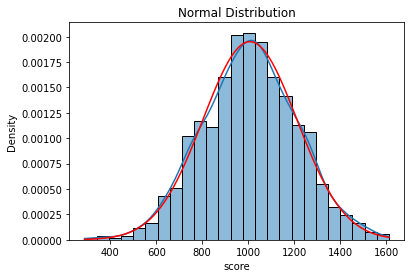

In [17]:
#Calculate the PDF of SAT scores

density = pd.DataFrame()
density["x"] = np.linspace(sat_score["score"].min()-0.01, sat_score["score"].max() + 0.01, 100 )

density["pdf"] = norm.pdf(density["x"],mu,sigma)

fig,ax = plt.subplots()

sns.histplot(sat_score["score"], ax=ax, kde=True,stat="density")
ax.plot(density["x"], density["pdf"], color="red")
plt.title("Normal Distribution")
plt.show()





In [56]:
# Calculate the probability that student will score less than 800 in the SAT exam

prob_less_than_800 = norm.cdf(800,mu,sigma)
print("Prob to score less than 800 ", round(prob_less_than_800,4))


Prob to score less than 800  0.1551


In [67]:
mean = 502
stdev = 115

z590 = (590-502)/115
z400 = (400-502)/115



stats.norm.cdf(z590,loc=0,scale=1)-stats.norm.cdf(z400,loc=0,scale=1)



0.5903777927789047

In [ ]:
sc.norm.cdf(1.9354,loc=0,scale=1)-sc.norm.cdf(0.645,loc=0,scale=1)

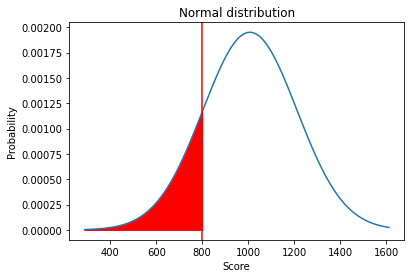

In [50]:
#plot the probability dist to score less than 800

plt.plot(density["x"],density["pdf"])
plt.axvline(x=800, c="r")
x1= np.linspace(density["x"].min(),800,50)
plt.fill_between(x1, norm.pdf(x1,mu,sigma),color="r")
plt.xlabel("Score")
plt.ylabel("Probability")
plt.title("Normal distribution")
plt.show()




In [51]:
# Calculate the probability that student will score More than 1300 in the SAT exam

prob_greater_than_1300 = 1- norm.cdf(1300,mu,sigma)
print("Prob to score greater than 1300  ", round(prob_greater_than_1300,4))

Prob to score greater than 1300   0.0762


In [ ]:
xx = 

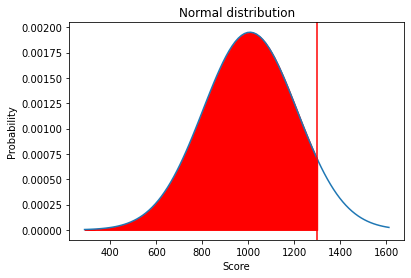

In [25]:
#plot the probability dist to score less than 1300

plt.plot(density["x"],density["pdf"])
plt.axvline(x=1300, c="r")
x1= np.linspace(density["x"].min(),1300,50)
plt.fill_between(x1, norm.pdf(x1,mu,sigma),color="r")
plt.xlabel("Score")
plt.ylabel("Probability")
plt.title("Normal distribution")
plt.show()

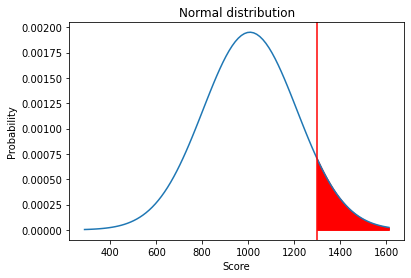

In [26]:
#plot the probability dist to score Greater than 1300

plt.plot(density["x"],density["pdf"])
plt.axvline(x=1300, c="r")
x1= np.linspace(density["x"].max(),1300,50)
plt.fill_between(x1, norm.pdf(x1,mu,sigma),color="r")
plt.xlabel("Score")
plt.ylabel("Probability")
plt.title("Normal distribution")
plt.show()

In [28]:
#Calculate the 90th percentile score using ppf() function

score_90_percentile = norm.ppf(0.90, mu, sigma)
print ("The 90th percentile score" , round(score_90_percentile))


The 90th percentile score 1269


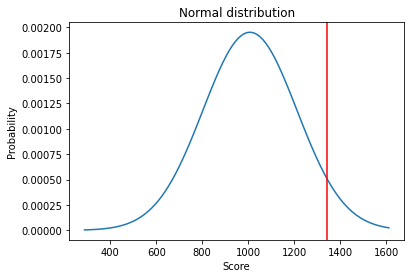

In [52]:
#plotting the 90th percentile score 

plt.plot(density["x"],density["pdf"])
plt.axvline(x=score_90_percentile, c="r")
plt.xlabel("Score")
plt.ylabel("Probability")
plt.title("Normal distribution")
plt.show()


In [53]:
#Calculate the 95th percentile score using ppf() function

score_95_percentile = norm.ppf(0.95, mu, sigma)
print ("The 90th percentile score" , round(score_95_percentile))

The 90th percentile score 1344


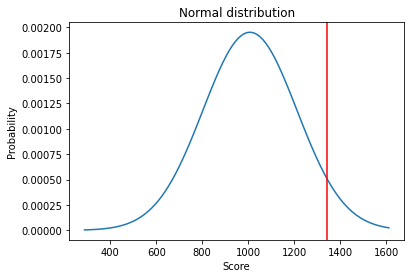

In [54]:
#plotting the 95th percentile score 

plt.plot(density["x"],density["pdf"])
plt.axvline(x=score_95_percentile, c="r")
plt.xlabel("Score")
plt.ylabel("Probability")
plt.title("Normal distribution")
plt.show()


In [55]:
#Calculate the marks a student score to be in top 10% i.e. 100-90%

score_top10_percentile = norm.ppf(0.90, mu, sigma)
print ("Min cutoff the marks a student score to be in top 10%" , round(score_top10_percentile))

Min cutoff the marks a student score to be in top 10% 1269


In [8]:
#A random sample of 100 men is taken and their mean height is found to be 180 cm. 
#The population variance is 36 cm2. Find the 95% confidence interval for the mean height of the population(μ).
# import the required function for getting the confidence level

from scipy.stats import norm
# set the values of sample mean and sigma
x_bar, sigma = 180, 6

# set the value of sample size
n = 100

# construct the confidence interval
confidence_level = np.round(norm.interval(0.95, loc=x_bar, scale=sigma / np.sqrt(n)), 2)

confidence_level

array([178.82, 181.18])

In [9]:
#A landlord wants to rent an unfurnished one-bedroom apartment in Chicago. 
#The mean monthly rent for a random sample of 100 apartments advertised on a website that lists apartments in Chicago for rent is $1000. Assume a population standard deviation of $200. 
#Construct a 95% confidence interval for the mean rent.
# import the required function for getting the confidence level

from scipy.stats import norm
# set the values of sample mean and sigma
x_bar, sigma = 1000, 200

# set the value of sample size
n = 100

# construct the confidence interval
confidence_level = np.round(norm.interval(0.95, loc=x_bar, scale=sigma / np.sqrt(n)), 2)

confidence_level

array([ 960.8, 1039.2])

In [15]:
#A survey of females aged 16-60 years was conducted by the Department of Population Censuses (DPC), 
#it was found that a sample of fifty female students has a mean height of 160.9 cm with a standard deviation of 6 cm.
#Determine the confidence interval of height with a confidence level of 95% and conclude whether their heights are typical of the general population?

from scipy.stats import norm
from scipy.stats import t

# set the values of sample mean and sigma
x_bar, s = 160.9, 6

# set the value of sample size
n = 50
k = n - 1

# construct the confidence interval
#confidence_level = np.round(norm.interval(0.95, loc=x_bar, scale=sigma / np.sqrt(n)), 2)

t_confidence_level = np.round(t.interval(0.95, df=k, loc=x_bar, scale=s/np.sqrt(n)), 2)

t_confidence_level


array([159.19, 162.61])